## CHEST X-RAY PNEUMONIA

#### https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

### Import class NORMAL images of training set

In [2]:
train_x=[]

path=r'C:\Users\ADMIN\xray\train\NORMAL\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((300, 300)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Create train_y of size NORMAL with zeros

In [3]:
a=len(train_x)
train_y=np.zeros(a)

#### Import class PNEUMONIA images of training set

In [4]:
path=r'C:\Users\ADMIN\xray\train\PNEUMONIA\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((300, 300)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Concatenate train_y  with ones of size PNEUMONIA

In [5]:
b=len(train_x)
trainy=np.concatenate((train_y,np.ones(b-a)))

In [6]:
trainx = np.stack(train_x) # Converts the list of arrays to a array of arrays

#### Cross verify

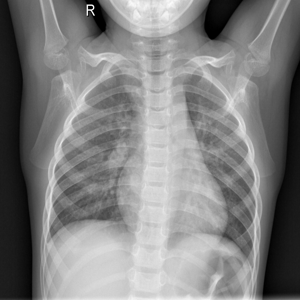

In [7]:
img = tf.keras.preprocessing.image.array_to_img(trainx[0]) 
img

### Import class NORMAL images of validation set

In [8]:
val_x=[]

path=r'C:\Users\ADMIN\xray\val\NORMAL\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((300, 300)) 
    val_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Create val_y of size NORMAL with zeros

In [9]:
a=len(val_x)
val_y=np.zeros(a)

#### Import class PNEUMONIA images of validation set

In [10]:
path=r'C:\Users\ADMIN\xray\val\PNEUMONIA\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((300, 300)) 
    val_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Concatenate train_y  with ones of size PNEUMONIA

In [11]:
b=len(val_x)
valy=np.concatenate((val_y,np.ones(b-a)))

In [12]:
valx = np.stack(val_x) # Converts the list of arrays to a array of arrays

In [18]:
# given validation set is small. So will use train_test_split

tx,vx,ty,vy=train_test_split(trainx,trainy)

#### Train Model

In [32]:
tf.random.set_seed(1234)
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5)

model=tf.keras.Sequential(
[
    layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Dropout(0.25),
            
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(8, 8)),
    layers.Dropout(0.2),  
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1,activation='sigmoid')
    
])

model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
mod=model.fit(tx,ty,validation_data=(vx,vy),batch_size=500,epochs=40,callbacks=[es])

Epoch 1/40
8/8 [==============================] - 63s 8s/step - loss: 103.8552 - precision_2: 0.7420 - recall_2: 0.7203 - val_loss: 9.1275 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/40
8/8 [==============================] - 64s 8s/step - loss: 15.1686 - precision_2: 0.7472 - recall_2: 0.7199 - val_loss: 0.7024 - val_precision_2: 0.7484 - val_recall_2: 0.9887
Epoch 3/40
8/8 [==============================] - 75s 9s/step - loss: 4.6687 - precision_2: 0.7552 - recall_2: 0.7320 - val_loss: 0.5796 - val_precision_2: 0.7620 - val_recall_2: 0.9784
Epoch 4/40
8/8 [==============================] - 69s 9s/step - loss: 2.5790 - precision_2: 0.7729 - recall_2: 0.7513 - val_loss: 0.4152 - val_precision_2: 0.8486 - val_recall_2: 0.9228
Epoch 5/40
8/8 [==============================] - 64s 8s/step - loss: 1.5681 - precision_2: 0.8000 - recall_2: 0.7689 - val_loss: 0.4072 - val_precision_2: 0.9005 - val_recall_2: 0.8940
Epoch 6/40
8/8 [==============================] - 64s 8s/st

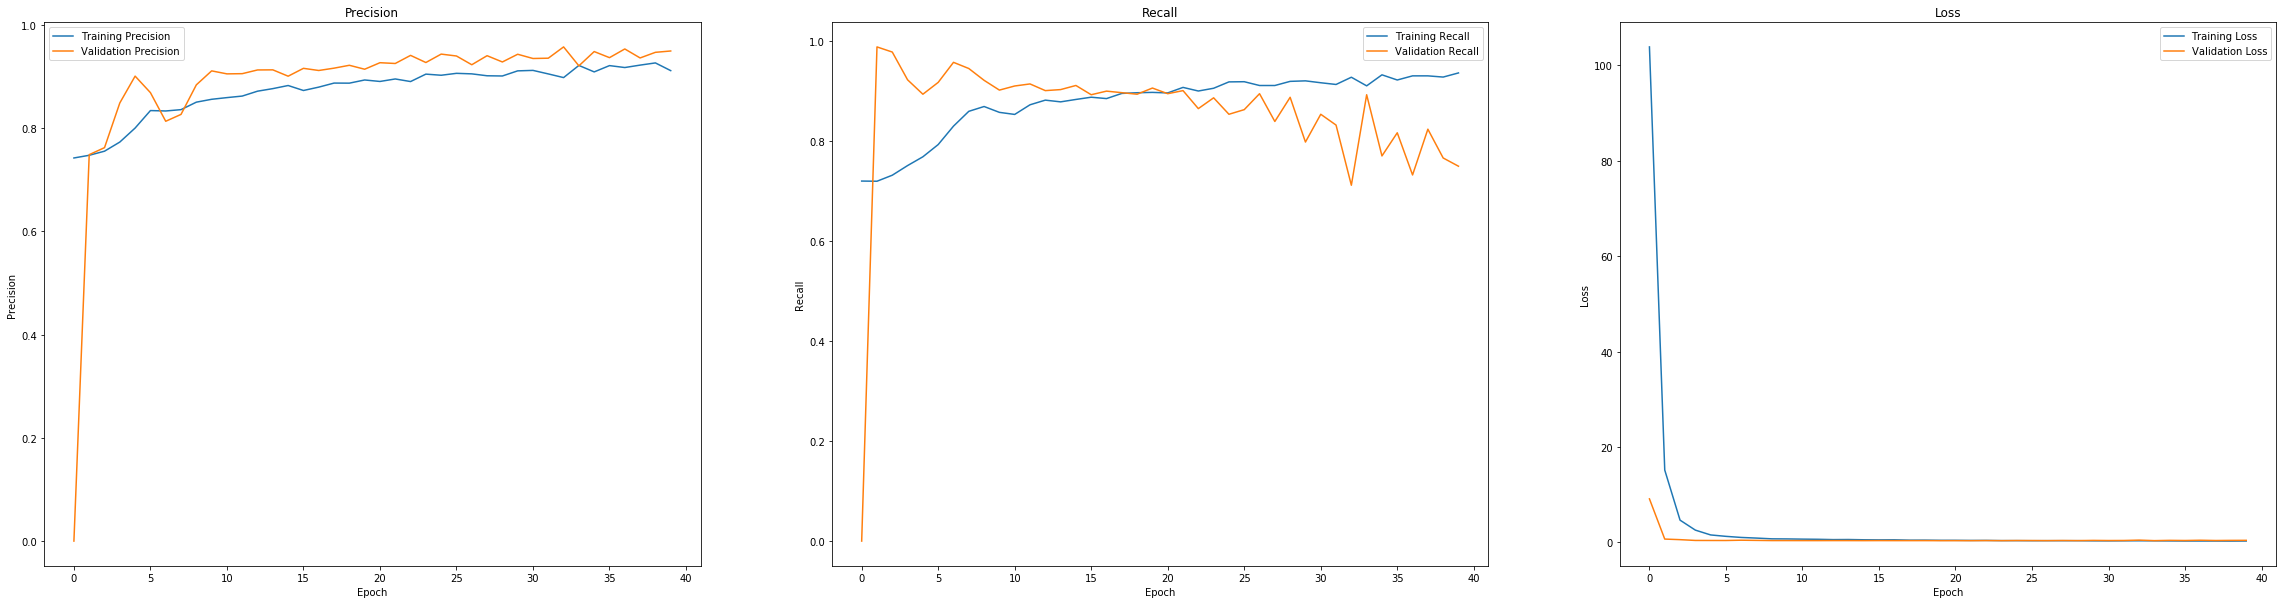

In [37]:
fig=plt.subplots(figsize=(40,10))

plt.subplot(1,3,1)
plt.plot(mod.history['precision_2'])
plt.plot(mod.history['val_precision_2'])
plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Training Precision','Validation Precision'])

plt.subplot(1,3,2)
plt.plot(mod.history['recall_2'])
plt.plot(mod.history['val_recall_2'])
plt.title('Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend(['Training Recall','Validation Recall'])

plt.subplot(1,3,3)
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])

plt.show()